### Homework: 8
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Apr 19, 2024

In [16]:
import pandas as pd
import numpy as np
import math
import re
import os
import glob
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, train_test_split, StratifiedKFold, cross_validate, KFold, GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, Ridge, LassoCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric, KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from scipy.linalg import pinv
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.utils import resample
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import _tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, hamming_loss, mean_squared_error, calinski_harabasz_score, silhouette_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import SpectralClustering

### 1
### (a)

In [2]:
df = pd.read_csv('../data/wdbc.data', header=None)

columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df.columns = columns
df

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b)

In [3]:
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### (i)

In [4]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_train_list = []
precision_train_list = []
recall_train_list = []
f1_train_list = []
auc_train_list = []
accuracy_test_list = []
precision_test_list = []
recall_test_list = []
f1_test_list = []
auc_test_list = []

M = 30
for _ in range(M):
    svm = LinearSVC(penalty='l1', dual=False, random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    best_C = grid_search.best_params_['C']
    
    svm_final = LinearSVC(penalty='l1', dual=False, C=best_C, random_state=42)
    svm_final.fit(X_train, y_train)
    
    y_pred_train = svm_final.predict(X_train)
    y_pred_test = svm_final.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    
    accuracy_train_list.append(accuracy_train)
    precision_train_list.append(precision_train)
    recall_train_list.append(recall_train)
    f1_train_list.append(f1_train)
    auc_train_list.append(auc_train)
    accuracy_test_list.append(accuracy_test)
    precision_test_list.append(precision_test)
    recall_test_list.append(recall_test)
    f1_test_list.append(f1_test)
    auc_test_list.append(auc_test)

avg_accuracy_train = np.mean(accuracy_train_list)
avg_precision_train = np.mean(precision_train_list)
avg_recall_train = np.mean(recall_train_list)
avg_f1_train = np.mean(f1_train_list)
avg_auc_train = np.mean(auc_train_list)
avg_accuracy_test = np.mean(accuracy_test_list)
avg_precision_test = np.mean(precision_test_list)
avg_recall_test = np.mean(recall_test_list)
avg_f1_test = np.mean(f1_test_list)
avg_auc_test = np.mean(auc_test_list)

Average metrics over 30 runs:
Test set - Accuracy: 0.9649, Precision: 0.9535, Recall: 0.9535, F1-score: 0.9535, AUC: 0.9627


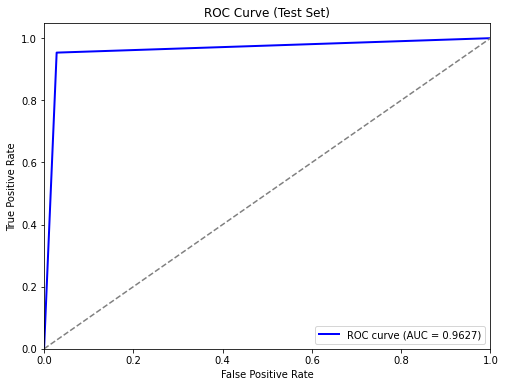

Confusion Matrix (Test Set):
 [[69  2]
 [ 2 41]]


In [46]:
print("Average metrics over {} runs:".format(M))
print("Test set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

Average metrics over 30 runs:
Training set - Accuracy: 0.9868, Precision: 0.9880, Recall: 0.9763, F1-score: 0.9821, AUC: 0.9847


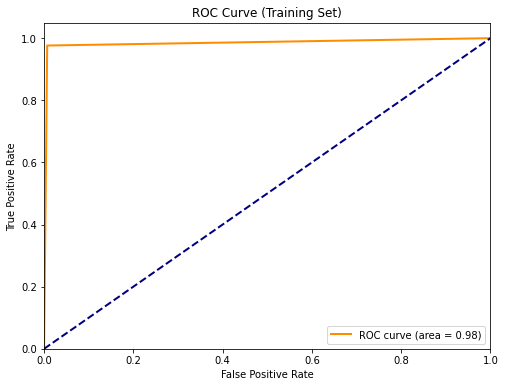

Confusion Matrix (Training Set):
 [[284   2]
 [  4 165]]


In [45]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)

print("Average metrics over {} runs:".format(M))
print("Training set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    accuracy_train, precision_train, recall_train, f1_train, auc_train))

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
auc_train = auc(fpr_train, tpr_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)

### (ii)

In [11]:
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

np.random.shuffle(positive_indices)
np.random.shuffle(negative_indices)

num_labeled_samples = min(len(positive_indices), len(negative_indices)) // 2

labeled_indices = np.concatenate([positive_indices[:num_labeled_samples], negative_indices[:num_labeled_samples]])
unlabeled_indices = np.setdiff1d(np.arange(len(y_train)), labeled_indices)

X_labeled = X_train[labeled_indices]
y_labeled = y_train[labeled_indices]
X_unlabeled = X_train[unlabeled_indices]

scaler = StandardScaler()
X_labeled_normalized = scaler.fit_transform(X_labeled)
X_unlabeled_normalized = scaler.transform(X_unlabeled)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm = LinearSVC(penalty='l1', dual=False)

grid_search = GridSearchCV(svm, param_grid, cv=cv)
grid_search.fit(X_labeled_normalized, y_labeled)

best_C = grid_search.best_params_['C']

accuracy_train_list = []
precision_train_list = []
recall_train_list = []
f1_train_list = []
auc_train_list = []
accuracy_test_list = []
precision_test_list = []
recall_test_list = []
f1_test_list = []
auc_test_list = []

M = 30

for _ in range(M):
    svm_final = LinearSVC(penalty='l1', dual=False, C=best_C, random_state=42)

    svm_final.fit(X_labeled_normalized, y_labeled)
    
    y_unlabeled_pred = svm_final.decision_function(X_unlabeled_normalized)
    
    farthest_idx = np.argmax(np.abs(y_unlabeled_pred))
    
    labeled_indices = np.append(labeled_indices, unlabeled_indices[farthest_idx])
    unlabeled_indices = np.delete(unlabeled_indices, farthest_idx)
    
    X_labeled = X_train[labeled_indices]
    y_labeled = y_train[labeled_indices]
    X_unlabeled = X_train[unlabeled_indices]
    
    X_labeled_normalized = scaler.fit_transform(X_labeled)
    
    svm_final.fit(X_labeled_normalized, y_labeled)
    y_pred_train = svm_final.predict(X_labeled_normalized)
    
    accuracy_train = accuracy_score(y_labeled, y_pred_train)
    precision_train = precision_score(y_labeled, y_pred_train)
    recall_train = recall_score(y_labeled, y_pred_train)
    f1_train = f1_score(y_labeled, y_pred_train)
    auc_train = roc_auc_score(y_labeled, y_pred_train)
    
    y_pred_test = svm_final.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    
    accuracy_train_list.append(accuracy_train)
    precision_train_list.append(precision_train)
    recall_train_list.append(recall_train)
    f1_train_list.append(f1_train)
    auc_train_list.append(auc_train)
    accuracy_test_list.append(accuracy_test)
    precision_test_list.append(precision_test)
    recall_test_list.append(recall_test)
    f1_test_list.append(f1_test)
    auc_test_list.append(auc_test)

avg_accuracy_train = np.mean(accuracy_train_list)
avg_precision_train = np.mean(precision_train_list)
avg_recall_train = np.mean(recall_train_list)
avg_f1_train = np.mean(f1_train_list)
avg_auc_train = np.mean(auc_train_list)
avg_accuracy_test = np.mean(accuracy_test_list)
avg_precision_test = np.mean(precision_test_list)
avg_recall_test = np.mean(recall_test_list)
avg_f1_test = np.mean(f1_test_list)
avg_auc_test = np.mean(auc_test_list)

Average metrics over 30 runs:
Training set - Accuracy: 0.9945, Precision: 1.0000, Recall: 0.9889, F1-score: 0.9944, AUC: 0.9944
Test set - Accuracy: 0.9518, Precision: 0.9029, Recall: 0.9775, F1-score: 0.9386, AUC: 0.9568


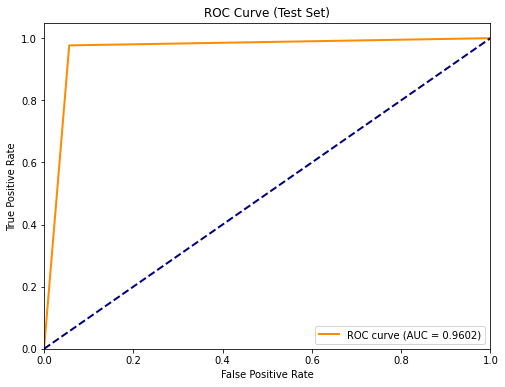

Confusion Matrix (Test Set):
 [[67  4]
 [ 1 42]]


In [12]:
print("Average metrics over {} runs:".format(M))
print("Training set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_train, avg_precision_train, avg_recall_train, avg_f1_train, avg_auc_train))
print("Test set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

Average metrics over 30 runs:
Training set - Accuracy: 0.9798, Precision: 0.9891, Recall: 0.9695, F1-score: 0.9791, AUC: 0.9796
Test set - Accuracy: 0.9523, Precision: 0.9047, Recall: 0.9767, F1-score: 0.9393, AUC: 0.9572


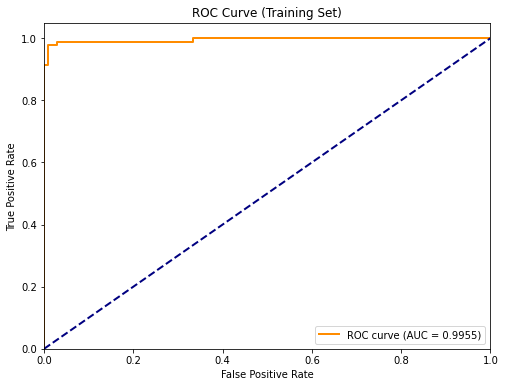

Confusion Matrix (Training Set):
 [[104   1]
 [  3  90]]


In [10]:
print("Average metrics over {} runs:".format(M))
print("Training set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_train, avg_precision_train, avg_recall_train, avg_f1_train, avg_auc_train))
print("Test set - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test))

fpr_train, tpr_train, thresholds_train = roc_curve(y_labeled, svm_final.decision_function(X_labeled_normalized))
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

conf_matrix_train = confusion_matrix(y_labeled, y_pred_train)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)

### iii

In [37]:
def kmeans_evaluation(X_train, y_train, X_test, y_test, n_clusters=2, n_init=10, random_state=42):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    auc_list = []
    conf_matrix_list = []
    M = 30

    for _ in range(M):
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
        kmeans.fit(X_train)

        cluster_centers = kmeans.cluster_centers_

        closest_points_indices = []
        for center in cluster_centers:
            distances = np.linalg.norm(X_train - center, axis=1)
            closest_points_indices.append(np.argsort(distances)[:30])

        cluster_labels = []
        for indices in closest_points_indices:
            majority_label = np.argmax(np.bincount(y_train[indices]))
            cluster_labels.append(majority_label)

        distances_to_centers = np.linalg.norm(X_test[:, np.newaxis, :] - cluster_centers, axis=2)
        closest_cluster_indices = np.argmin(distances_to_centers, axis=1)
        y_pred_test = np.array([cluster_labels[idx] for idx in closest_cluster_indices])

        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        auc_test = roc_auc_score(y_test, y_pred_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)

        accuracy_list.append(accuracy_test)
        precision_list.append(precision_test)
        recall_list.append(recall_test)
        f1_list.append(f1_test)
        auc_list.append(auc_test)
        conf_matrix_list.append(conf_matrix_test)

    avg_accuracy_test = np.mean(accuracy_list)
    avg_precision_test = np.mean(precision_list)
    avg_recall_test = np.mean(recall_list)
    avg_f1_test = np.mean(f1_list)
    avg_auc_test = np.mean(auc_list)
    avg_conf_matrix_test = np.mean(conf_matrix_list, axis=0)

    return avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test, avg_conf_matrix_test

In [38]:
avg_accuracy_train, avg_precision_train, avg_recall_train, avg_f1_train, avg_auc_train, avg_conf_matrix_train = kmeans_evaluation(X_train, y_train, X_train, y_train)

print("Average metrics over {} runs for Training Set:".format(M))
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_train, avg_precision_train, avg_recall_train, avg_f1_train, avg_auc_train))
print("Confusion Matrix (Training Set):")
print(avg_conf_matrix_train)

Average metrics over 30 runs for Training Set:
Accuracy: 0.8989, Precision: 0.8917, Recall: 0.8284, F1-score: 0.8589, AUC: 0.8845
Confusion Matrix (Training Set):
[[269.  17.]
 [ 29. 140.]]


In [39]:
avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test, avg_conf_matrix_test = kmeans_evaluation(X_train, y_train, X_test, y_test)

print("Average metrics over {} runs for Test Set:".format(M))
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
    avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test))
print("Confusion Matrix (Test Set):")
print(avg_conf_matrix_test)

Average metrics over 30 runs for Test Set:
Accuracy: 0.9298, Precision: 0.9730, Recall: 0.8372, F1-score: 0.9000, AUC: 0.9116
Confusion Matrix (Test Set):
[[70.  1.]
 [ 7. 36.]]


### iv

In [47]:
def spectral_clustering_evaluation(X_train, y_train, X_test, y_test, M=30):
    accuracy_train_list = []
    precision_train_list = []
    recall_train_list = []
    f1_train_list = []
    auc_train_list = []
    conf_matrix_train_list = []

    accuracy_test_list = []
    precision_test_list = []
    recall_test_list = []
    f1_test_list = []
    auc_test_list = []
    conf_matrix_test_list = []

    M = 30
    
    for _ in range(M):
        spectral_clf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=42)
        y_pred_train = spectral_clf.fit_predict(X_train)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_train = precision_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)
        auc_train = roc_auc_score(y_train, y_pred_train)
        conf_matrix_train = confusion_matrix(y_train, y_pred_train)

        accuracy_train_list.append(accuracy_train)
        precision_train_list.append(precision_train)
        recall_train_list.append(recall_train)
        f1_train_list.append(f1_train)
        auc_train_list.append(auc_train)
        conf_matrix_train_list.append(conf_matrix_train)

        y_pred_test = spectral_clf.fit_predict(X_test)

        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        auc_test = roc_auc_score(y_test, y_pred_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)

        accuracy_test_list.append(accuracy_test)
        precision_test_list.append(precision_test)
        recall_test_list.append(recall_test)
        f1_test_list.append(f1_test)
        auc_test_list.append(auc_test)
        conf_matrix_test_list.append(conf_matrix_test)

    avg_accuracy_train = np.mean(accuracy_train_list)
    avg_precision_train = np.mean(precision_train_list)
    avg_recall_train = np.mean(recall_train_list)
    avg_f1_train = np.mean(f1_train_list)
    avg_auc_train = np.mean(auc_train_list)
    avg_conf_matrix_train = np.mean(conf_matrix_train_list, axis=0)

    avg_accuracy_test = np.mean(accuracy_test_list)
    avg_precision_test = np.mean(precision_test_list)
    avg_recall_test = np.mean(recall_test_list)
    avg_f1_test = np.mean(f1_test_list)
    avg_auc_test = np.mean(auc_test_list)
    avg_conf_matrix_test = np.mean(conf_matrix_test_list, axis=0)

    return (avg_accuracy_train, avg_precision_train, avg_recall_train, avg_f1_train, avg_auc_train, avg_conf_matrix_train), \
           (avg_accuracy_test, avg_precision_test, avg_recall_test, avg_f1_test, avg_auc_test, avg_conf_matrix_test)

(train_metrics, test_metrics) = spectral_clustering_evaluation(X_train, y_train, X_test, y_test)

In [45]:
print("Average metrics over 30 runs for Training Set:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(*train_metrics[:5]))
print("Confusion Matrix (Training Set):\n", train_metrics[5])

Average metrics over 30 runs for Training Set:
Accuracy: 0.6330, Precision: 1.0000, Recall: 0.0118, F1-score: 0.0234, AUC: 0.5059
Confusion Matrix (Training Set):
 [[286.   0.]
 [167.   2.]]


In [46]:
print("\nAverage metrics over 30 runs for Test Set:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(*test_metrics[:5]))
print("Confusion Matrix (Test Set):\n", test_metrics[5])


Average metrics over 30 runs for Test Set:
Accuracy: 0.7456, Precision: 1.0000, Recall: 0.3256, F1-score: 0.4912, AUC: 0.6628
Confusion Matrix (Test Set):
 [[71.  0.]
 [29. 14.]]


### v
### Upon analysis, supervised learning emerges as the most effective method, demonstrating the highest accuracy overall. With an average accuracy of 0.9868 on the training set and 0.9649 on the test set, it showcases robust predictive capability. Semi-supervised learning follows closely behind, with a test set accuracy of 0.9518. Unsupervised learning provides insights into data structure but achieves lower accuracy, averaging 0.8989 on the training set and 0.9298 on the test set. Spectral clustering yields the least favorable outcomes, with accuracies of 0.6330 on the training set and 0.7456 on the test set, indicating limited performance compared to supervised and semi-supervised methods.
### 2.
### (a)

In [18]:
bank_df = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
bank_df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### (b)
### i

In [51]:
lin_svc_test_error = []

for i in range(50):
    temp_error = []
    
    rng = np.random.default_rng(seed=i)
    X_train_shuffled = rng.permutation(X_train)
    rng = np.random.default_rng(seed=i)
    y_train_shuffled = rng.permutation(y_train)
    
    for j in range(10, 901, 10):
        X_selected = X_train_shuffled[:j]
        y_selected = y_train_shuffled[:j]

        model = LinearSVC(penalty='l1', dual=False, random_state=i)
        
        param_grid = {'C': np.logspace(-2, 0, num=20, endpoint=True, base=10.0)}
        skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
        
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1)
        grid_search.fit(X_selected, y_selected)
        
        y_pred = grid_search.best_estimator_.predict(X_test)
        temp_error.append(accuracy_score(y_test, y_pred))
    
    lin_svc_test_error.append(temp_error)

average_test_error = np.mean(lin_svc_test_error, axis=0)
print("Average Test Error:", average_test_error)

Average Test Error: [0.81271186 0.90927966 0.94072034 0.95584746 0.96072034 0.9675
 0.97190678 0.97423729 0.97588983 0.97864407 0.97894068 0.98173729
 0.9845339  0.98394068 0.98610169 0.98605932 0.98614407 0.98673729
 0.98605932 0.98614407 0.98711864 0.98792373 0.98754237 0.98677966
 0.9875     0.98766949 0.98762712 0.9875     0.98851695 0.98826271
 0.98826271 0.98860169 0.98855932 0.9890678  0.98944915 0.98872881
 0.9890678  0.98889831 0.98877119 0.98898305 0.98902542 0.98868644
 0.98902542 0.98894068 0.98919492 0.98881356 0.98898305 0.98927966
 0.98949153 0.98915254 0.98919492 0.9890678  0.98911017 0.98949153
 0.98911017 0.98923729 0.98932203 0.98923729 0.98940678 0.98919492
 0.98927966 0.98932203 0.98927966 0.98927966 0.98927966 0.98944915
 0.98936441 0.98923729 0.98936441 0.98927966 0.98936441 0.98927966
 0.98932203 0.98932203 0.98923729 0.98940678 0.98927966 0.98940678
 0.98940678 0.98932203 0.98940678 0.98940678 0.98932203 0.98932203
 0.98932203 0.98932203 0.98932203 0.98936441 0